In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

df_1_1 = pd.DataFrame(pd.read_excel(r"1-1.xlsx")) 
df_1_2 = pd.DataFrame(pd.read_excel(r"1-2.xlsx"))
df_3 = pd.DataFrame(pd.read_excel(r"3-1.xlsx")) 
df_4 = pd.DataFrame(pd.read_excel(r"4-1.xlsx"))
df_5= pd.DataFrame(pd.read_excel(r"5-1.xlsx"))

### <p style="text-align: center;">Вопрос 1:</p>
Рассчитайте общую сумму в USD по активным билетам (Статус - "А").

In [3]:
df_1_1

,Номер,Сумма,Валюта,Статус
0,5552122193438,610.69,EUR,A
1,5559435660244,12994.00,RUB,A
2,5552489043054,26100.00,RUB,A
3,5556147789855,5997.00,RUB,A
4,5552489006084,7387.00,RUB,A
...,...,...,...,...
650,5552122457873,208.02,EUR,A
651,5552487796993,1927960.00,UZS,A
652,5552487416379,5150801.00,UZS,X
653,5553396163854,2634.00,CNY,A


In [4]:
df_1_2

,Валюта,Курс
0,AED,3.67275
1,AMD,525.22600
2,AZN,1.70000
3,CAD,1.26189
4,CNY,6.47176
5,CUP,24.00000
6,DKK,6.13364
7,EGP,15.70200
8,EUR,0.82470
9,GBP,0.71237


In [5]:
def func(x):
    if x == 'USD':
        return 1.0
    return float(dict(df_1_2.values)[str(x)])

test = df_1_1[df_1_1['Статус'] == 'A']
test['ans'] = test['Сумма'] / test['Валюта'].apply(func)
print(sum(test['ans'].values))

137252.30842616197


C:\Users\vlad2\AppData\Local\Temp\ipykernel_19244\3397689278.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ans'] = test['Сумма'] / test['Валюта'].apply(func)


**Ответ на вопрос №1**: 137252.30842616197

---

### <p style="text-align: center;">Вопрос 2:</p>
Необходимо посчитать KPI менеджеру. Вам известны плановые, фактические значения показателей и их веса в KPI, а размер премии при 100% выполнении KPI составляет 100 000 рублей. 

**Ответ на вопрос №2**: 

---

### <p style="text-align: center;">Вопрос 3:</p>

Ниже приведена выгрузка по продажам доп услуг. (одна строчка - одна проданная доп услуга). Проанализируйте какие именно доп услуги начали продаваться активнее всего и какие агенты делают это лучше всех.

In [73]:
df_3

,Дата,Агент,Тип
0,2021-05-22,"Вайт Тревел, ООО",SEAT
1,2021-05-22,"Вайт Тревел, ООО",SEAT
2,2021-05-01,"Вайт Тревел, ООО",SEAT
3,2021-05-01,"Вайт Тревел, ООО",SEAT
4,2021-05-01,"Вайт Тревел, ООО",SEAT
...,...,...,...
35353,2021-05-04,"Вайт Тревел, ООО",SEAT
35354,2021-05-04,"Вайт Тревел, ООО",SEAT
35355,2021-05-04,"Вайт Тревел, ООО",SEAT
35356,2021-05-12,"Вайт Тревел, ООО",SEAT


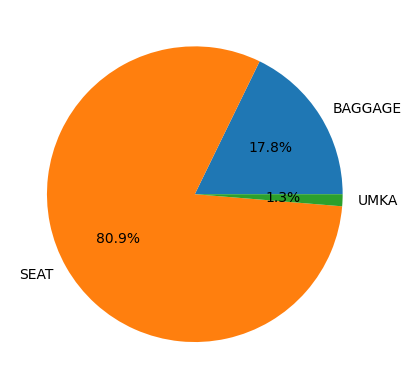

In [91]:
_ = plt.pie([len(df_3[df_3['Тип'] == 'BAGGAGE']), len(df_3[df_3['Тип'] == 'SEAT']), len(df_3[df_3['Тип'] == 'UMKA'])], labels=['BAGGAGE', 'SEAT', 'UMKA'],autopct='%1.1f%%')

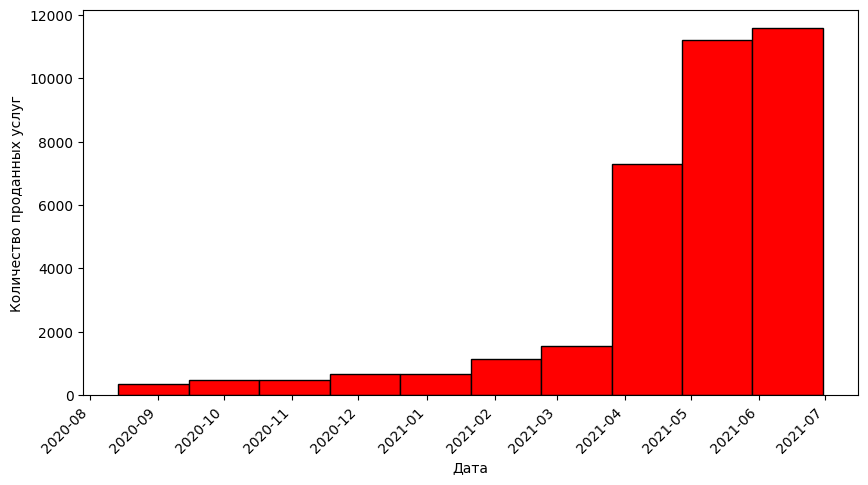

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.hist(df_3['Дата'] ,color = 'red', edgecolor = 'black')
ax.set_xlabel('Дата')
ax.set_ylabel('Количество проданных услуг')
_ = plt.xticks(rotation=45, horizontalalignment='right', fontsize=10)

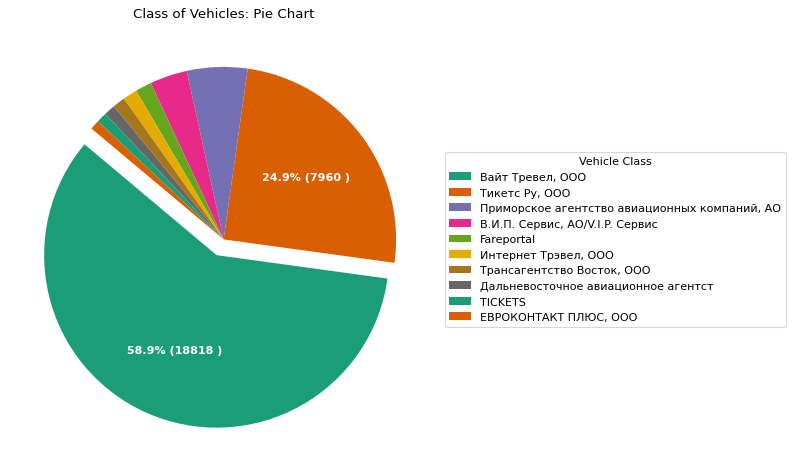

In [53]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

df = df_3.groupby('Агент').size().reset_index(name='counts').sort_values(by='counts', ascending=False)[:10]
data = df['counts']
categories = df['Агент']

explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    if pct < 20:
        return
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140, explode=explode)

# Decoration
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()

**Ответ на вопрос №3**: активнее всего начали продаваться услуги с типом "SEAT". Больше всего услуг было продано в период с июня по июль 2021 года. Самый популярный агент продажи - "Вайт Тревел, ООО".

---

### <p style="text-align: center;">Вопрос 4:</p>

Ниже приведена выгрузка продаж. Мошенники выписывают билеты более одного под кодами разных корпоративных клиентов (код СК).
Перечислите мошенников.

In [55]:
df_4

,Имя,Билет,Код СК
0,LEGENDRE/FREDERIC PIERRE MR,5554843972386,CK1074
1,KABYSHKIN/ALEKSANDR SERGEEVIC,5552491031435,CK961
2,TRUNIN/PAVLO ALEKSEEVICH MR,5559543242518,CK2092
3,BEREZIN/DENIS GENNADEVICH MR,5552491019288,CK961
4,RIYANOV/RANIS RISHATOVICH MR,5552491019956,CK054
...,...,...,...
9629,ZEMLYAKOV/ANDREY NIKOLAEVICH,5556049543815,CK2002
9630,KORZHOV/NIKOLAI ALEKSANDROVIC,5552490001882,CK1940
9631,BAZILEVICH/MAXIM NIKOLAEVICH,5559543271181,CK019
9632,BYKOV/OLEG EDUARDOVICH,5556175143665,CK1475


*Если я правильно понял условие задачи - нам нужно найти имена таких людей, которые выписали больше, чем один билет, причём среди их выписанных билетов встречаются по-крайней мере два таких, что их коды СК будут разными.*

In [67]:
for name in set(df_4['Имя'].values):
    df = df_4[df_4['Имя'] == name]
    if len(df) < 2:
        continue
    if len(set(df['Код СК'])) > 1:
        print(name)

VASILYEV/SERGEY VLADIMIROVICH
IVANOV/ALEXEY MR
IVANOVA/ULIANA VLADIMIROVNA M
ZAKHAROV/SERGEY ALEKSANDROVIC
KUZNETSOV/DENIS ALEKSEEVICH
ORLOV/DMITRY MR
POPOV/ANDREI MR


**Ответ на вопрос №4**:   

VASILYEV/SERGEY VLADIMIROVICH  
IVANOV/ALEXEY MR  
IVANOVA/ULIANA VLADIMIROVNA M  
ZAKHAROV/SERGEY ALEKSANDROVIC  
KUZNETSOV/DENIS ALEKSEEVICH  
ORLOV/DMITRY MR  
POPOV/ANDREI MR  

---

### <p style="text-align: center;">Вопрос 5:</p>

Сейчас 18:25. Необходимо обработать билеты и перевести купоны в статус IROP. Обработка билетов в среднем отнимает разное время в зависимости от их сложности. Список билетов  и среднее время, которое нужно потратить на их обработку приведены ниже. Во сколько Вы закончите обработку билетов?

Билет (минимальное значение для любого): 1  
Если в билете больше одного купона: +2  
Если есть карта АФЛ-бонуса: +0,5  
Если статус купонов в билете не "ОК": +1  
 

In [72]:
df_5

,Билет,АФЛ-Б,Купоны,Статус
0,5552436381760,NO CARD,EVNSVO-SVOMRV,EXCH
1,5552136376967,AFL BONUS CARD,SVOMCX-MCXSVO,"OK,OK"
2,5552136376968,AFL BONUS CARD,SVOMCX-MCXSVO,"OK,OK"
3,5552136382617,NO CARD,SVOBAX-BAXSVO,"OK,OK"
4,5552136390848,AFL BONUS CARD,UUSSVO-SVOMRV-MRVSVO-SVOUUS,OK
...,...,...,...,...
491,5552136554990,AFL BONUS CARD,SVORGK-RGKSVO,OK
492,5552436548376,NO CARD,SVONAL-NALSVO,"OK,OK"
493,5552136557009,NO CARD,PEESVO,OK
494,5552136544608,AFL BONUS CARD,SVOMRV-MRVSVO,"EXCH,EXCH"


*Если я правильно понял условие задачи, требуется приравнивать время обработки к 1 минуте в случае, если суммарное время обработки меньше 1 минуты.*

In [77]:
set(df_5['Статус'])

{'EXCH', 'EXCH,EXCH', 'OK', 'OK,OK', 'RFND', 'RFND,RFND'}

In [86]:
df = df_5.copy()

def func1(x):
    if x == 'NO CARD':
        return 0
    return 0.5

def func2(x):
    if '-' in x:
        return 2
    return 0

def func3(x):
    if 'EXCH' not in x and 'RFND' not in x:
        return 0
    return 1

df['Время'] = df['АФЛ-Б'].apply(func1) + df['Купоны'].apply(func2) + df['Статус'].apply(func3)

def func4(x):
    if x < 1:
        return 1
    return x

df['Время'] = df['Время'].apply(func4)
sum(df['Время'].values) / 60

17.016666666666666

*Обработка билетов заняла 17 часов 10 минут. Следовательно, мы закончим обработку в 18:25 + 17:10 = 11:35*

**Ответ на вопрос №5**: 11:35

---

### <p style="text-align: center;">Вопрос 6:</p>
Посчитайте количество I и J с учетом доп условий: если перед I стоит K, то I считается за J, а если после J стоит M - J считается за I  

IIIIJJIJJIJJIJJJIJKIJKIKJIJJKIJMIJIMKMIJKMKMIJIJIJJIJIIMKMIJKKMKMIJIJIJJJIIKKJIJJIKJJIJMKJJIJIKIJIJKMKJIJIJKMKKJIJIJIJMKMKMKMKJIJIJIJKJIIMIMIJJKJIMKJIJKIJIJIMKMIJKJJIJIJMIIMIMKJIMIJKJIMIJKJKJJIMKJIMKJIMKJIJKMMKJIKMKMKMKJIJIJIMKMKMKJIJIJKMMKJIJIJMIKIKIKIJIJKMKJIJIJIMIJIIJKKIIIIIMIJKMKJIJIJKMKJIMIJKJJKMIJKJKIMIJIJIKIJKJIJKJKJIMMIMIMIJIJJIJMIMIJIJJIIIJIJKJKJKJJKJJJJIMIMIMIMMKJIMMKJIMIMIMIIMIIMIJIJIJIJIJKJKJJKJI  



*Если я правильно понял условие задачи, последовательность "KIM" эквивалентна "I", другими словами, последовательность является пластичной в плане преобразований, таким образом одно преобразование может далее переходить в другое. В данном примере, слева-направо, сначала "KI" преобразуется в "J", затем "JM" преобразуется в "I".*

In [98]:
deq = list()

s = 'IIIIJJIJJIJJIJJJIJKIJKIKJIJJKIJMIJIMKMIJKMKMIJIJIJJIJIIMKMIJKKMKMIJIJIJJJIIKKJIJJIKJJIJMKJJIJIKIJIJKMKJIJIJKMKKJIJIJIJMKMKMKMKJIJIJIJKJIIMIMIJJKJIMKJIJKIJIJIMKMIJKJJIJIJMIIMIMKJIMIJKJIMIJKJKJJIMKJIMKJIMKJIJKMMKJIKMKMKMKJIJIJIMKMKMKJIJIJKMMKJIJIJMIKIKIKIJIJKMKJIJIJIMIJIIJKKIIIIIMIJKMKJIJIJKMKJIMIJKJJKMIJKJKIMIJIJIKIJKJIJKJKJIMMIMIMIJIJJIJMIMIJIJJIIIJIJKJKJKJJKJJJJIMIMIMIMMKJIMMKJIMIMIMIIMIIMIJIJIJIJIJKJKJJKJI'

i_count = 0
j_count = 0

for i in s:
    deq.append(i)
    if deq[-1] == 'I':
        i_count += 1
    elif deq[-1] == 'J':
        j_count += 1
    if len(deq) == 1:
        continue
    while True and len(deq) > 1:
        if deq[-1] == 'I' and deq[-2] == 'K':
            deq.pop()
            deq.pop()
            deq.append('J')
            i_count -= 1
            j_count += 1
            continue
        if deq[-1] == 'M' and deq[-2] == 'J':
            deq.pop()
            deq.pop()
            deq.append('I')
            i_count += 1
            j_count -= 1
            continue
        break

print(i_count, j_count)

128 140


**Ответ на вопрос №6**: количество I: 128, количество J: 140.

---

---
### <p style="text-align: center;">Вопрос 7:</p>
В бизнес-классе самолета 3 ряда кресел. Вы собираетесь совершить 3 перелета. Какова вероятность, что вы каждый раз будете лететь на разном ряду?

Варианты ответов:

А. 0  
Б. 1/9  
В. 2/9  
Г. 1/3  
Д. 1  


**Ответ на вопрос №7**: В. 2/9

---

### <p style="text-align: center;">Вопрос 8:</p>
Вашему другу было 32 года 8 лет назад. Сколько ему было Х лет назад?
Варианты ответов:  

А. Х-40  
Б. Х-24  
В. 40-Х  
Г. 24-Х  
Д. 24+Х  

**Ответ на вопрос №8**: В. 40-Х

---

### <p style="text-align: center;">Вопрос 9:</p>
Загрузка рейса состоит из мужчин и женщин в пропорции 4/5 (без детей и инфантов). Эти пассажиры грузятся в самолет 3 автобусами с равным количеством человек в каждом. В первом автобусе пропорция мужчин и женщин 4 к 11. Во втором и третьем автобусе пропорции одинаковые. Какая пропорция мужчин и женщин в 3 автобусе.

Варианты ответов:

А. 8 к 7  
Б. 2 к 3  
В. 1 к 2  
Г. 3 к 12  
Д. 3 к 2  

**Ответ**:

---